### Connecting Google Drive

In [72]:
# Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')
!pip install fuzzywuzzy

#for visualization
!pip install pydotplus
!pip install graphviz

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import timeit
from prettytable import PrettyTable
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### Download Original Dataset

In [74]:
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/DataMining"
# !kaggle datasets download -d laotse/credit-risk-dataset

### Unzip Dataset to DataMining Folder

In [75]:
# #Unzip process
# !unzip -q credit-risk-dataset.zip -d /content/drive/MyDrive/DataMining/CreditRiskData

### Loading DataFrame

In [76]:
df = pd.read_csv("/content/drive/MyDrive/DataMining/CreditRiskData/credit_risk_dataset.csv")
data=df.copy()
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENt,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Dataset Information

In [77]:
print("Informations about Training Dataset")
data.info()
print()
data.columns

Informations about Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

##Confusion Matrix

<ipython-input-78-bf5311e4a3e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmax =.8, square = True, annot = True,cmap='Reds' )


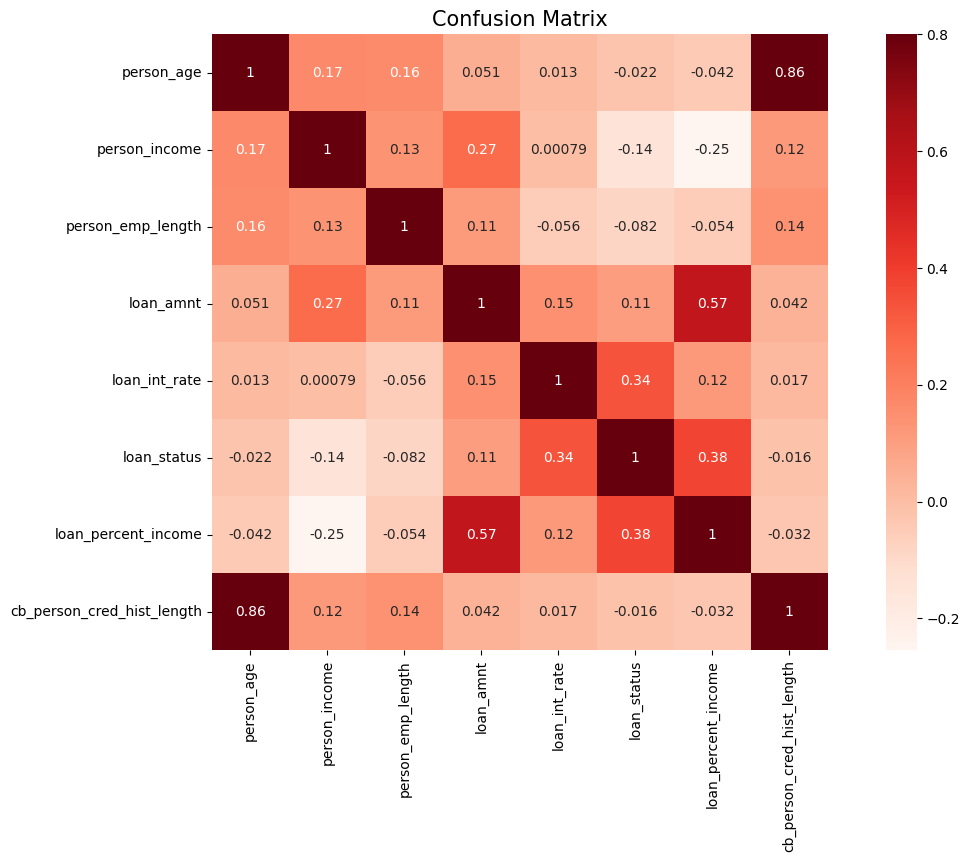

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(), vmax =.8, square = True, annot = True,cmap='Reds' )
plt.title('Confusion Matrix',fontsize=15);

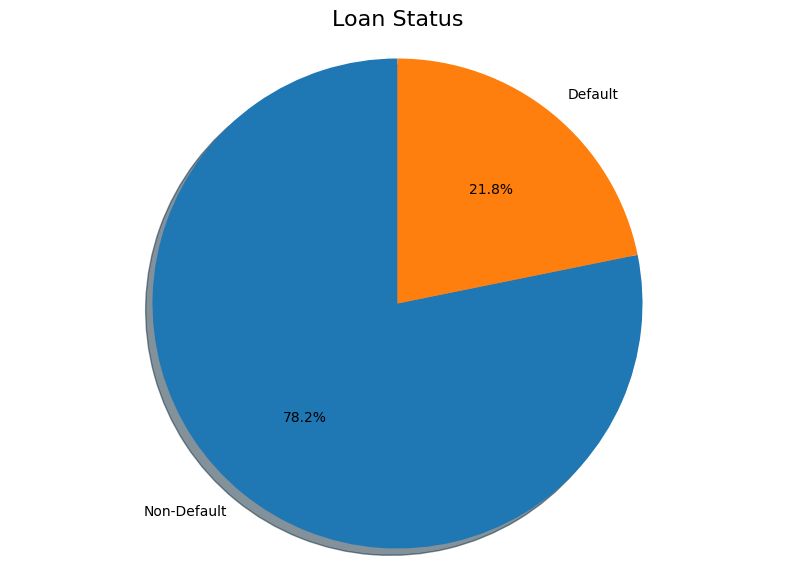

In [79]:
# Default = temerrüt ==> Has not paid its debt, is in default
loan_status_labels = ["Non-Default", "Default"]
loan_status_counts = data["loan_status"].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(loan_status_counts, labels=loan_status_labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Loan Status", fontsize=16)
plt.legend().set_visible(False)
plt.axis('equal')
plt.show()

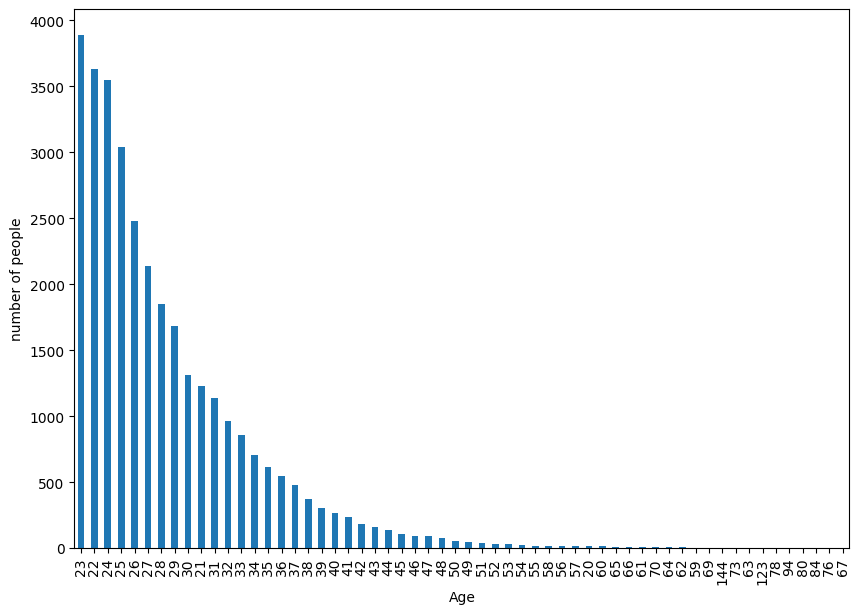

In [80]:
# distribution of customers according to "age" attribute
plt.figure(figsize=(10,7))
data["person_age"].value_counts().plot.bar()
plt.xlabel("Age")
plt.ylabel("number of people")
plt.show()


### Show and Fill Missing Values

In [81]:
print(data.isnull().sum())

# Fill columns of type Object with mode and columns of type numeric with mean
for column in data.columns:
    if data[column].dtype == 'O':  # Object type
        data[column] = data[column].fillna(data[column].mode()[0])  # Fill with mode
    else:
        data[column] = data[column].fillna(data[column].mean())  # Fill with mean


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [82]:
print(data.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


### Finding Duplicate Data

In [83]:
# Detect duplicate data
duplicate_rows = data[data.duplicated()]

# Print the number of duplicate data and the first part of the duplicate data
print("Number of Dublicate Data:", len(duplicate_rows))
print("Duplicate Data:")
print(duplicate_rows.head())

Number of Dublicate Data: 165
Duplicate Data:
       person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
15975     VENTURE          B       6000           9.99            0   
15989   EDUCATION          B       8000          10.36            0   
15995     MEDICAL          A       4000           5.42            0   
16025    PERSONAL          A       3000           7.90            1   
16028   EDUCATION          A      15000           7.88            0   

       loan_percent_income cb_person_default_on_file  \
15975   

## Deleting Duplicate Data

In [84]:
# Clear duplicate lines
data.drop_duplicates(inplace=True)

In [85]:
duplicate_rows = data[data.duplicated()]
print("Number of Dublicate Data:", len(duplicate_rows))

Number of Dublicate Data: 0


##Standartization

In [86]:
print(data["person_home_ownership"].unique())
def replace_matches_in_column(data, column, string_to_match, min_ratio = 65):
    strings = data[column].unique()

    matches = fuzzywuzzy.process.extract(string_to_match, strings,
                                         limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    # only get matches with a ratio > 65
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    rows_with_matches = data[column].isin(close_matches)
    data.loc[rows_with_matches, column] = string_to_match
    # let us know the function's done
    # print("All done!")

['RENt' 'OWN' 'MORTGAGE' 'RENT' 'OVN' 'OWn' 'RET' 'MORTAGE' 'OTHER']


In [87]:
replace_matches_in_column(data=data, column='person_home_ownership', string_to_match="OWN")
replace_matches_in_column(data=data, column='person_home_ownership', string_to_match="RENT")
replace_matches_in_column(data=data, column='person_home_ownership', string_to_match="MORTGAGE")
replace_matches_in_column(data=data, column='person_home_ownership', string_to_match="OTHER")
data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

##ONEHOT

In [88]:
one_hot_encoded_data = pd.get_dummies(data, columns = [ 'person_home_ownership'])
data=one_hot_encoded_data
data

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1
1,21,9600,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0
2,25,9600,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0
3,23,65500,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1
4,24,54400,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,1,0,0,0
32577,54,120000,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,1,0,0,0
32578,65,76000,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0,0,0,1
32579,56,150000,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,1,0,0,0


##Outliers

In [89]:
numeric_columns = data.select_dtypes(include=['number']).columns
outlier_columns=[]
for i in numeric_columns:
  if(data[i].mean()>1):
    outlier_columns.append(i)
outlier_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length']

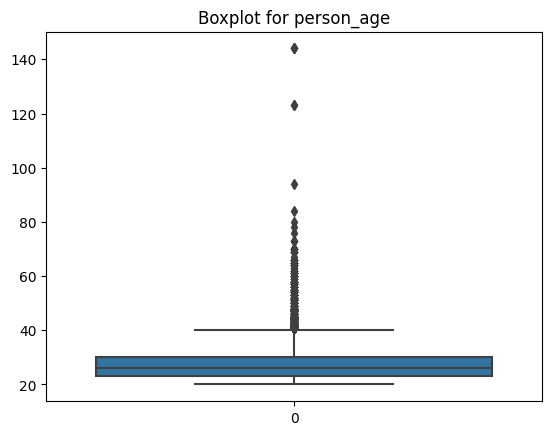

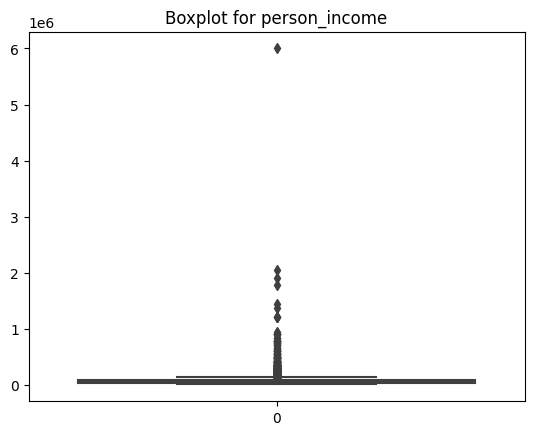

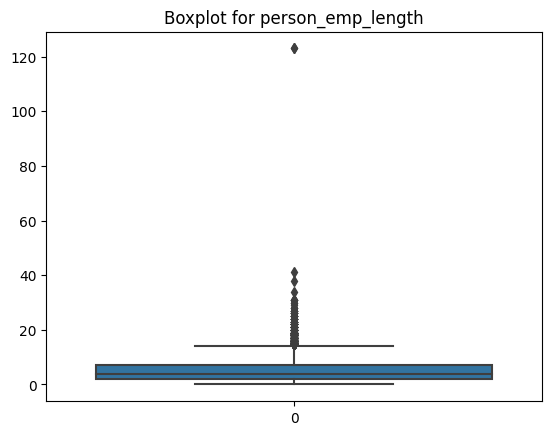

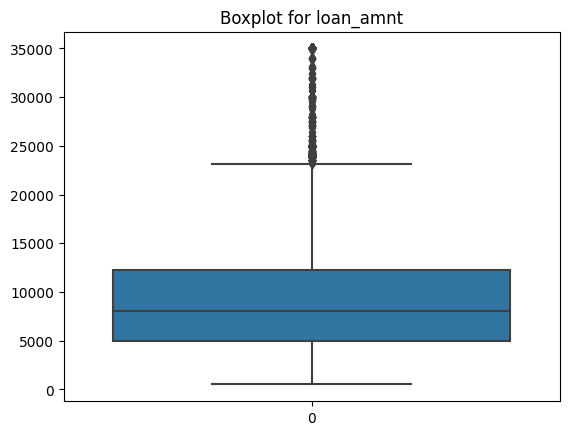

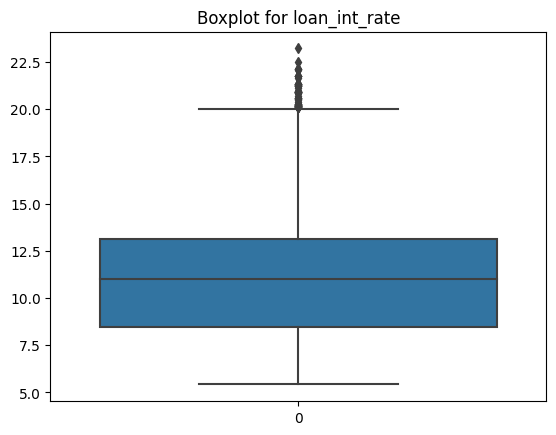

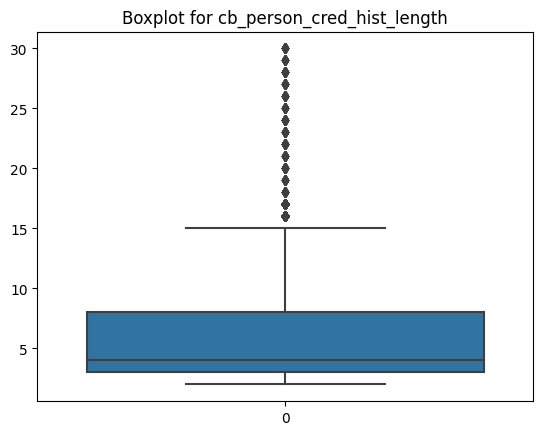

In [90]:
for attr in outlier_columns:
  plt.figure()
  sns.boxplot(data[attr])
  plt.title(f'Boxplot for {attr}')

In [91]:
def outlier_detector(data, column):
    outliers = pd.DataFrame()
    if column == 'person_age':
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)][column]
    else:
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        outliers[column] = data[abs(z_scores) > 3][column]
    return outliers

outliers_person_age = outlier_detector(data, 'person_age')
data = data[~data['person_age'].isin(outliers_person_age['person_age'])]
# print the outliers
print("IQR based outliers for person_age:")
print(outliers_person_age)

print("z-score based outliers:")
for col in outlier_columns:
    if col != 'person_age':
        out_values=outlier_detector(data, col)[col]
        print(out_values)
        data = data[~data[col].isin(out_values)]



IQR based outliers for person_age:
       person_age
81            144
183           144
575           123
747           123
29121          50
...           ...
32576          57
32577          54
32578          65
32579          56
32580          66

[1491 rows x 1 columns]
z-score based outliers:
15       500000
33       306000
34       300000
42       300000
43       300000
          ...  
32037    828000
32070    780000
32073    233000
32224    430000
32253    325000
Name: person_income, Length: 366, dtype: int64
0        123.0
210      123.0
17850     17.0
17888     18.0
17997     19.0
         ...  
32272     18.0
32280     20.0
32286     21.0
32288     22.0
32294     18.0
Name: person_emp_length, Length: 318, dtype: float64
3        35000
4        35000
6        35000
7        35000
8        35000
         ...  
31831    30000
31955    30000
31957    30000
32158    35000
32268    30000
Name: loan_amnt, Length: 311, dtype: int64
523      21.21
1827     21.27
2436     21.74
2620  

In [92]:
data.index = range(1, len(data) + 1)
data

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
1,21,9600,5.0,EDUCATION,B,1000,11.140000,0,0.10,N,2,0,0,1,0
2,25,9600,1.0,MEDICAL,C,5500,12.870000,1,0.57,N,3,1,0,0,0
3,21,9900,2.0,VENTURE,A,2500,7.140000,1,0.25,N,2,0,0,1,0
4,21,10000,6.0,VENTURE,D,1600,14.740000,1,0.16,N,3,0,0,1,0
5,21,10000,2.0,HOMEIMPROVEMENT,A,4500,8.630000,1,0.45,N,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29420,36,44000,4.0,DEBTCONSOLIDATION,D,8000,17.490000,1,0.18,N,15,0,0,0,1
29421,40,33000,2.0,HOMEIMPROVEMENT,B,1000,11.011695,0,0.03,N,15,1,0,0,0
29422,37,90000,11.0,DEBTCONSOLIDATION,A,4000,6.620000,0,0.04,N,15,1,0,0,0
29423,38,200000,0.0,DEBTCONSOLIDATION,A,3000,7.680000,0,0.01,N,12,1,0,0,0


##Normalization

In [93]:
#min-max normalization
data["person_income"] = (data["person_income"] - data["person_income"].min()) / (data["person_income"].max() - data["person_income"].min())
data["loan_amnt"] = (data["loan_amnt"] - data["loan_amnt"].min()) / (data["loan_amnt"].max() - data["loan_amnt"].min())
data["person_emp_length"] = (data["person_emp_length"] - data["person_emp_length"].min()) / (data["person_emp_length"].max() - data["person_emp_length"].min())
data

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
1,21,0.027680,0.3125,EDUCATION,B,0.018450,11.140000,0,0.10,N,2,0,0,1,0
2,25,0.027680,0.0625,MEDICAL,C,0.184502,12.870000,1,0.57,N,3,1,0,0,0
3,21,0.029185,0.1250,VENTURE,A,0.073801,7.140000,1,0.25,N,2,0,0,1,0
4,21,0.029686,0.3750,VENTURE,D,0.040590,14.740000,1,0.16,N,3,0,0,1,0
5,21,0.029686,0.1250,HOMEIMPROVEMENT,A,0.147601,8.630000,1,0.45,N,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29420,36,0.200181,0.2500,DEBTCONSOLIDATION,D,0.276753,17.490000,1,0.18,N,15,0,0,0,1
29421,40,0.145021,0.1250,HOMEIMPROVEMENT,B,0.018450,11.011695,0,0.03,N,15,1,0,0,0
29422,37,0.430849,0.6875,DEBTCONSOLIDATION,A,0.129151,6.620000,0,0.04,N,15,1,0,0,0
29423,38,0.982449,0.0000,DEBTCONSOLIDATION,A,0.092251,7.680000,0,0.01,N,12,1,0,0,0


##Label Encoding

In [94]:
label_encoder = LabelEncoder()
data['loan_grade'] = label_encoder.fit_transform(data['loan_grade'])
data

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
1,21,0.027680,0.3125,EDUCATION,1,0.018450,11.140000,0,0.10,N,2,0,0,1,0
2,25,0.027680,0.0625,MEDICAL,2,0.184502,12.870000,1,0.57,N,3,1,0,0,0
3,21,0.029185,0.1250,VENTURE,0,0.073801,7.140000,1,0.25,N,2,0,0,1,0
4,21,0.029686,0.3750,VENTURE,3,0.040590,14.740000,1,0.16,N,3,0,0,1,0
5,21,0.029686,0.1250,HOMEIMPROVEMENT,0,0.147601,8.630000,1,0.45,N,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29420,36,0.200181,0.2500,DEBTCONSOLIDATION,3,0.276753,17.490000,1,0.18,N,15,0,0,0,1
29421,40,0.145021,0.1250,HOMEIMPROVEMENT,1,0.018450,11.011695,0,0.03,N,15,1,0,0,0
29422,37,0.430849,0.6875,DEBTCONSOLIDATION,0,0.129151,6.620000,0,0.04,N,15,1,0,0,0
29423,38,0.982449,0.0000,DEBTCONSOLIDATION,0,0.092251,7.680000,0,0.01,N,12,1,0,0,0


In [95]:
#dummy encoding
data_encoded = pd.get_dummies(data['cb_person_default_on_file'], prefix='cb_person_default_on_file')
data = pd.concat([data, data_encoded], axis=1)
data = data.drop('cb_person_default_on_file', axis=1)
data

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,0.027680,0.3125,EDUCATION,1,0.018450,11.140000,0,0.10,2,0,0,1,0,1,0
2,25,0.027680,0.0625,MEDICAL,2,0.184502,12.870000,1,0.57,3,1,0,0,0,1,0
3,21,0.029185,0.1250,VENTURE,0,0.073801,7.140000,1,0.25,2,0,0,1,0,1,0
4,21,0.029686,0.3750,VENTURE,3,0.040590,14.740000,1,0.16,3,0,0,1,0,1,0
5,21,0.029686,0.1250,HOMEIMPROVEMENT,0,0.147601,8.630000,1,0.45,2,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29420,36,0.200181,0.2500,DEBTCONSOLIDATION,3,0.276753,17.490000,1,0.18,15,0,0,0,1,1,0
29421,40,0.145021,0.1250,HOMEIMPROVEMENT,1,0.018450,11.011695,0,0.03,15,1,0,0,0,1,0
29422,37,0.430849,0.6875,DEBTCONSOLIDATION,0,0.129151,6.620000,0,0.04,15,1,0,0,0,1,0
29423,38,0.982449,0.0000,DEBTCONSOLIDATION,0,0.092251,7.680000,0,0.01,12,1,0,0,0,1,0


In [96]:
#print statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,29424.0,26.513764,4.257940,20.00,23.000000,25.000000,29.000000,40.00
person_income,29424.0,0.287141,0.163615,0.00,0.170093,0.252332,0.360646,1.00
person_emp_length,29424.0,0.283648,0.221363,0.00,0.125000,0.250000,0.437500,1.00
loan_grade,29424.0,1.203133,1.148180,0.00,0.000000,1.000000,2.000000,6.00
loan_amnt,29424.0,0.321653,0.212166,0.00,0.166052,0.276753,0.424354,1.00
loan_int_rate,29424.0,10.973026,3.040108,5.42,8.490000,11.011695,13.110000,20.17
loan_status,29424.0,0.218087,0.412954,0.00,0.000000,0.000000,0.000000,1.00
loan_percent_income,29424.0,0.170563,0.105784,0.01,0.090000,0.150000,0.230000,0.83
cb_person_cred_hist_length,29424.0,5.072492,2.997367,2.00,3.000000,4.000000,7.000000,15.00
person_home_ownership_MORTGAGE,29424.0,0.403786,0.490664,0.00,0.000000,0.000000,1.000000,1.00


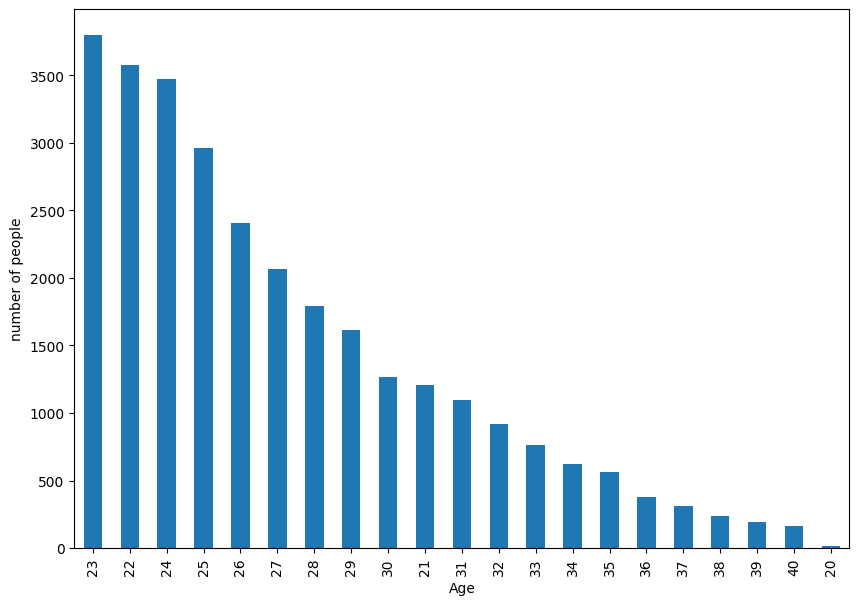

In [97]:
# distribution of customers according to "age" attribute
plt.figure(figsize=(10,7))
data["person_age"].value_counts().plot.bar()
plt.xlabel("Age")
plt.ylabel("number of people")
plt.show()


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29424 entries, 1 to 29424
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      29424 non-null  int64  
 1   person_income                   29424 non-null  float64
 2   person_emp_length               29424 non-null  float64
 3   loan_intent                     29424 non-null  object 
 4   loan_grade                      29424 non-null  int64  
 5   loan_amnt                       29424 non-null  float64
 6   loan_int_rate                   29424 non-null  float64
 7   loan_status                     29424 non-null  int64  
 8   loan_percent_income             29424 non-null  float64
 9   cb_person_cred_hist_length      29424 non-null  int64  
 10  person_home_ownership_MORTGAGE  29424 non-null  uint8  
 11  person_home_ownership_OTHER     29424 non-null  uint8  
 12  person_home_ownership_OWN       

In [99]:
feature_cols=['person_age','person_income','person_emp_length','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file_Y','cb_person_default_on_file_N','person_home_ownership_RENT','person_home_ownership_OWN','person_home_ownership_OTHER','person_home_ownership_MORTGAGE' ]
X = data[feature_cols]
y = data.loan_status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 90% training and 10% test

##SVM

In [61]:
svm_model_linear = SVC(kernel='linear')
svm_model_poly = SVC(kernel='poly')
svm_model_rbf = SVC(kernel='rbf')
svm_model_sigmo = SVC(kernel='sigmoid')
svm_model_c100 = SVC(C=100)
svm_model_c50 = SVC(C=50)
svm_model_linear_c10 = SVC(kernel='linear', C= 10)

#Neural Network

In [62]:
nn_model_100 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model_300 = MLPClassifier(hidden_layer_sizes=(300, 50), max_iter=500, random_state=42)
nn_model_100iter = MLPClassifier(hidden_layer_sizes=(300, 50), max_iter=100, random_state=42)
nn_model_complex = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=500, batch_size=32)


##Naive Bayes

In [63]:
# Create Naive Bayes classifer object
model_gausNB = GaussianNB()
model_bernNB = BernoulliNB()
model_multiNNB=MultinomialNB()

#KNN

Text(0, 0.5, 'Accuracy Score')

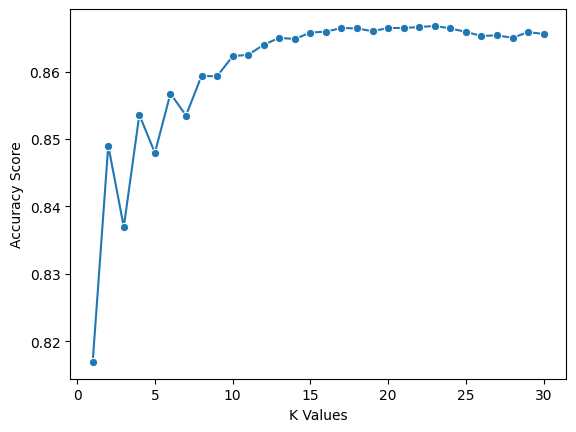

In [30]:
##k-values
k_values = [i for i in range (1,31)]
scores = []
scaler = StandardScaler()
X = scaler.fit_transform(X)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [64]:
# Create K Nearest Neighbor classifer object
model_knn=KNeighborsClassifier(n_neighbors=7,p=2,metric='minkowski', n_jobs=-1)
model_knn1=KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean', n_jobs=-1)
model_knn2=KNeighborsClassifier(n_neighbors=8,p=2,metric='euclidean', n_jobs=-1)
model_knn3=KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean', n_jobs=-1)
model_knn4=KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean', n_jobs=-1)
model_knn5=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean', n_jobs=-1)

##Decision Tree

In [65]:
# Create Decision Tree classifer object
model_DTr_ent5 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_DTr_ent4 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model_DTr_ll5 = DecisionTreeClassifier(criterion="log_loss", max_depth=5)
model_DTr_ll4 = DecisionTreeClassifier(criterion="log_loss", max_depth=4)

### Comparison Table

In [33]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Since all NN and SVM models are included in this models array, there is a working time of over 3 hours. For this reason, a reduced model array that takes less time is given below.
# models = [model_knn, model_knn1, model_knn2, model_knn3, model_knn4, model_knn5, model_bernNB, model_gausNB,model_multiNNB, model_DTr_ent5,model_DTr_ent4, model_DTr_ll5,model_DTr_ll4,
#           nn_model_100, nn_model_300, nn_model_100iter, nn_model_complex, svm_model_linear, svm_model_poly, svm_model_rbf, svm_model_sigmo, svm_model_c100, svm_model_c50, svm_model_linear_c10]


models = [nn_model_100,svm_model_linear,model_knn,model_knn1,model_knn2,model_knn3,model_knn4,model_knn5, model_bernNB, model_gausNB,model_multiNNB, model_DTr_ent5,model_DTr_ent4, model_DTr_ll5,model_DTr_ll4]
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Avg. Cross-Val. Score"]
start_time = timeit.default_timer()
for model in models:
    if model in [nn_model_100, nn_model_300, nn_model_100iter, nn_model_complex]:

      scaler = StandardScaler()

      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)
      model.fit(X_train_scaled, y_train)

      y_pred = model.predict(X_test_scaled)
    else:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
    accuracy = format(metrics.accuracy_score(y_test, y_pred), ".3f")
    precision = format(metrics.precision_score(y_test, y_pred, pos_label=0), ".3f")
    recall = format(metrics.recall_score(y_test, y_pred, pos_label=0), ".3f")
    f1 = format(f1_score(y_test, y_pred, pos_label=0), ".3f")
    cm = confusion_matrix(y_test, y_pred)
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    avg_score = format(np.mean(scores), ".3f")
    table.add_row([str(model), accuracy, precision, recall, f1, avg_score])

print(table)
elapsed_time_model_1 = timeit.default_timer() - start_time
minutes_model_1, seconds_model_1 = divmod(elapsed_time_model_1, 60)
print(f"Runtime for selected models : {int(minutes_model_1)} minutes {int(seconds_model_1)} seconds")

+----------------------------------------------------------------------------+----------+-----------+--------+----------+-----------------------+
|                                   Model                                    | Accuracy | Precision | Recall | F1-Score | Avg. Cross-Val. Score |
+----------------------------------------------------------------------------+----------+-----------+--------+----------+-----------------------+
| MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42) |  0.903   |   0.910   | 0.971  |  0.940   |         0.893         |
|                            SVC(kernel='linear')                            |  0.845   |   0.864   | 0.951  |  0.906   |         0.852         |
|               KNeighborsClassifier(n_jobs=-1, n_neighbors=7)               |  0.831   |   0.856   | 0.943  |  0.897   |         0.832         |
|     KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=7)     |  0.831   |   0.856   | 0.943  |  0.897   |   

## ROC for KNN

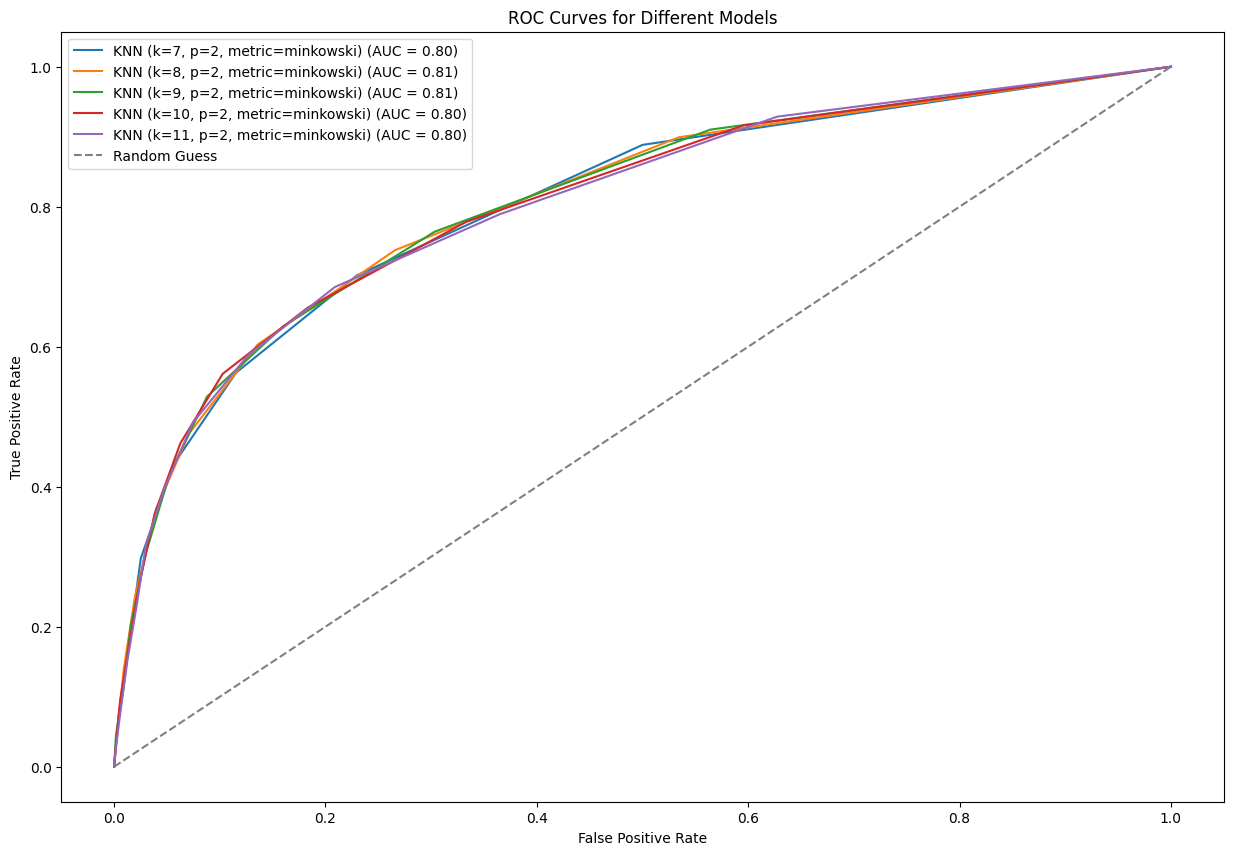

In [100]:
models_knn = [KNeighborsClassifier(n_neighbors=i) for i in range(7, 12)]
plt.figure(figsize=(15, 10))
for model in models_knn:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    model_params = f'KNN (k={model.n_neighbors}, p={model.p}, metric={model.metric})'
    plt.plot(fpr, tpr, label=f'{model_params} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

### ROC for Naive Bayes

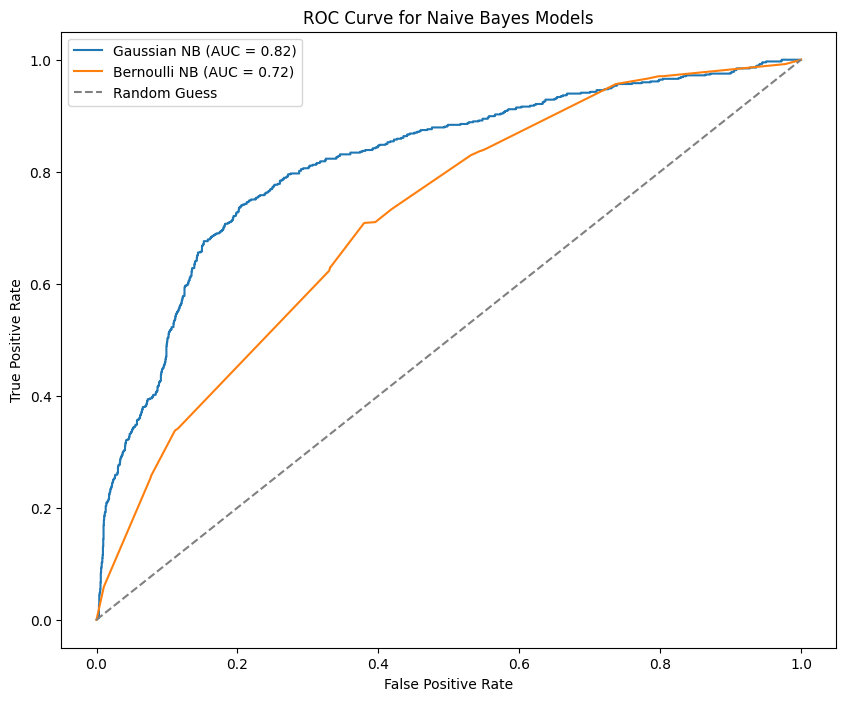

In [102]:
models = [model_gausNB, model_bernNB]
model_names = ['Gaussian NB', 'Bernoulli NB']
plt.figure(figsize=(10, 8))
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Models')
plt.legend()
plt.show()

## ROC for Decision Tree

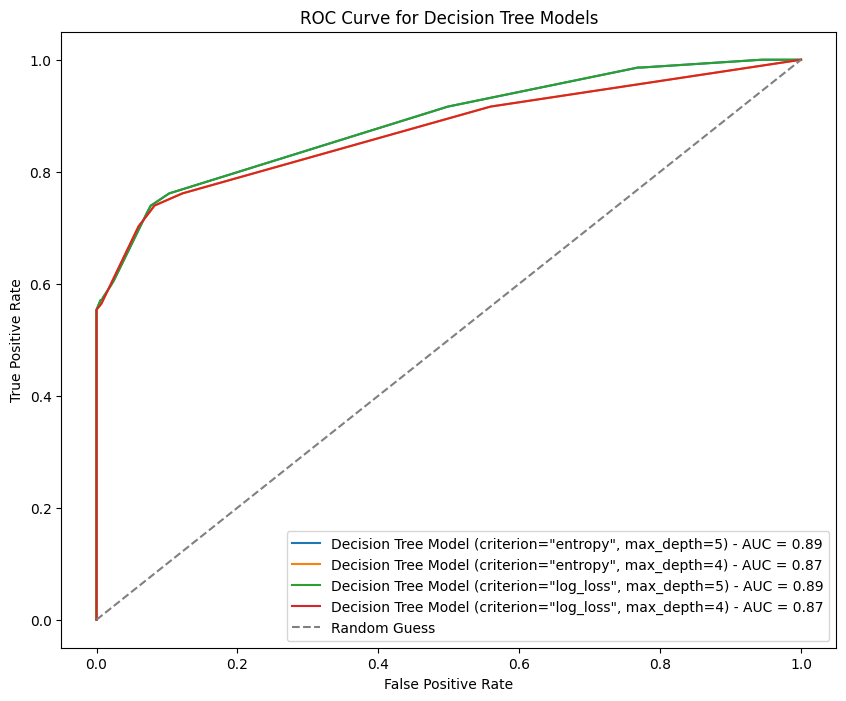

In [103]:
models = [
    (DecisionTreeClassifier(criterion="entropy", max_depth=5), 'Decision Tree Model (criterion="entropy", max_depth=5)'),
    (DecisionTreeClassifier(criterion="entropy", max_depth=4), 'Decision Tree Model (criterion="entropy", max_depth=4)'),
    (DecisionTreeClassifier(criterion="log_loss", max_depth=5), 'Decision Tree Model (criterion="log_loss", max_depth=5)'),
    (DecisionTreeClassifier(criterion="log_loss", max_depth=4), 'Decision Tree Model (criterion="log_loss", max_depth=4)')
]
plt.figure(figsize=(10, 8))
for model, model_name in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} - AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Models')
plt.legend()
plt.show()

### ROC for NN and SVC

In [104]:
#scaling for NN and SVM models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


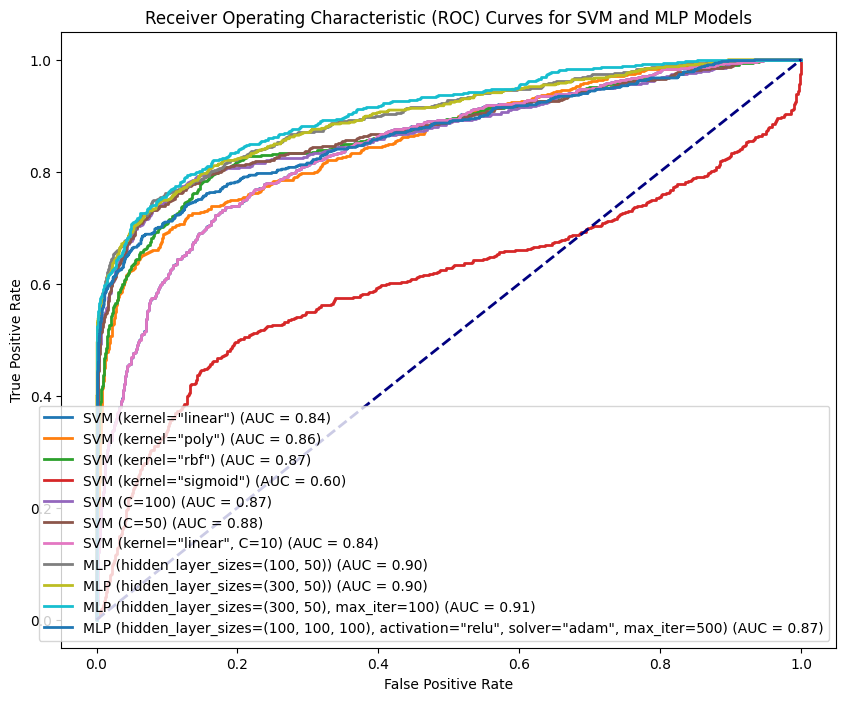

In [107]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have trained SVM and MLP models with the given configurations
svm_models = [
    (SVC(kernel='linear'), 'SVM (kernel="linear")'),
    (SVC(kernel='poly'), 'SVM (kernel="poly")'),
    (SVC(kernel='rbf'), 'SVM (kernel="rbf")'),
    (SVC(kernel='sigmoid'), 'SVM (kernel="sigmoid")'),
    (SVC(C=100), 'SVM (C=100)'),
    (SVC(C=50), 'SVM (C=50)'),
    (SVC(kernel='linear', C=10), 'SVM (kernel="linear", C=10)')
]

mlp_models = [
    (MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42), 'MLP (hidden_layer_sizes=(100, 50))'),
    (MLPClassifier(hidden_layer_sizes=(300, 50), max_iter=500, random_state=42), 'MLP (hidden_layer_sizes=(300, 50))'),
    (MLPClassifier(hidden_layer_sizes=(300, 50), max_iter=100, random_state=42), 'MLP (hidden_layer_sizes=(300, 50), max_iter=100)'),
    (MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=500, batch_size=32), 'MLP (hidden_layer_sizes=(100, 100, 100), activation="relu", solver="adam", max_iter=500)')
]

# Replace X_test_scaled and y_test with your test data
plt.figure(figsize=(10, 8))

# Plot ROC Curves for SVM models
for svm_model, svm_model_name in svm_models:
    svm_model.fit(X_train_scaled, y_train)
    y_pred_proba_svm = svm_model.decision_function(X_test_scaled)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    plt.plot(fpr_svm, tpr_svm, lw=2, label=f'{svm_model_name} (AUC = {roc_auc_svm:.2f})')

# Plot ROC Curves for MLP models
for mlp_model, mlp_model_name in mlp_models:
    mlp_model.fit(X_train_scaled, y_train)
    y_pred_proba_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
    roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
    plt.plot(fpr_mlp, tpr_mlp, lw=2, label=f'{mlp_model_name} (AUC = {roc_auc_mlp:.2f})')

# Plot the random ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for SVM and MLP Models')
plt.legend(loc='lower right')
plt.show()


### ROC for KNN, Decision Tree and Naive Bayes

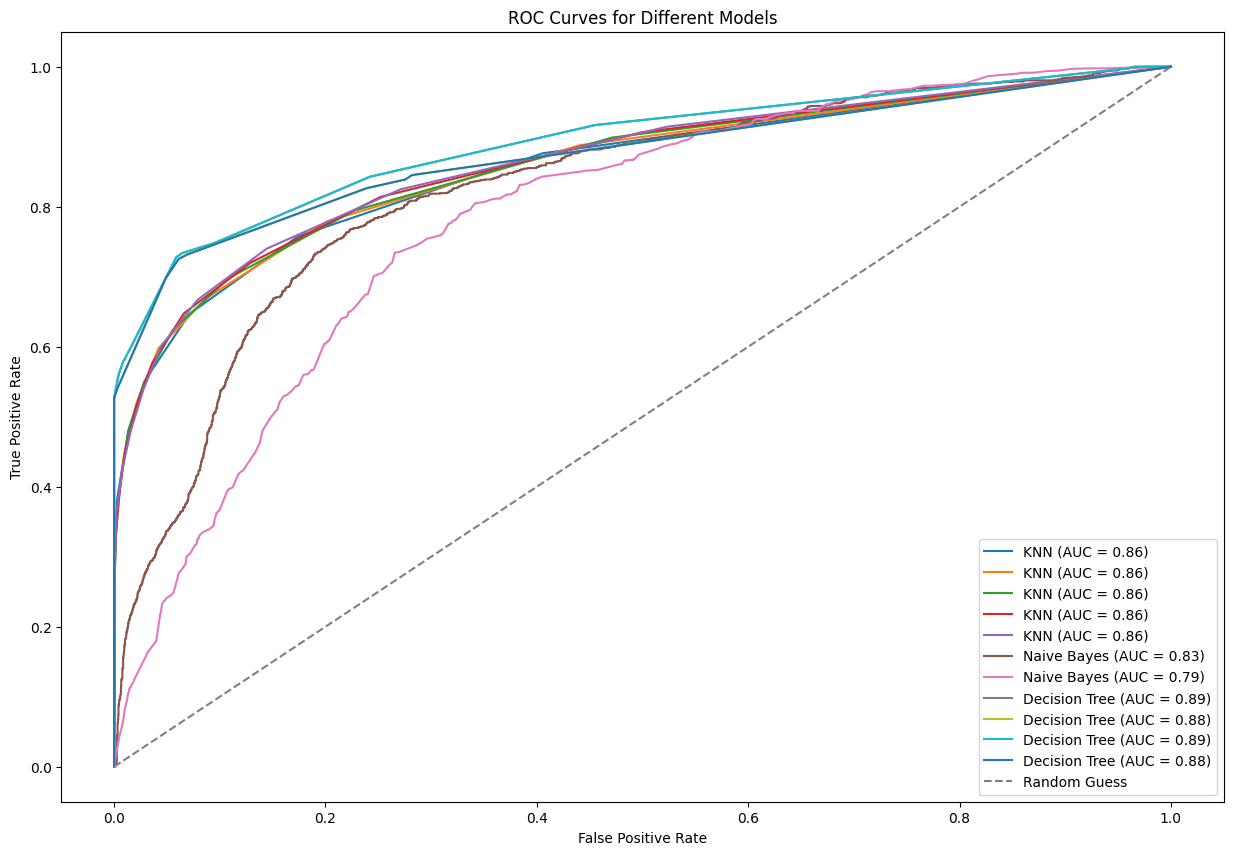

In [46]:
models_knn = [KNeighborsClassifier(n_neighbors=i) for i in range(7, 12)]
models_nb = [GaussianNB(), BernoulliNB()]
models_dt = [
    DecisionTreeClassifier(criterion="entropy", max_depth=5),
    DecisionTreeClassifier(criterion="entropy", max_depth=4),
    DecisionTreeClassifier(criterion="log_loss", max_depth=5),
    DecisionTreeClassifier(criterion="log_loss", max_depth=4)
]
plt.figure(figsize=(15, 10))
for model in models_knn:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
for model in models_nb:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
for model in models_dt:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

## ROC for **ALL** Models

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


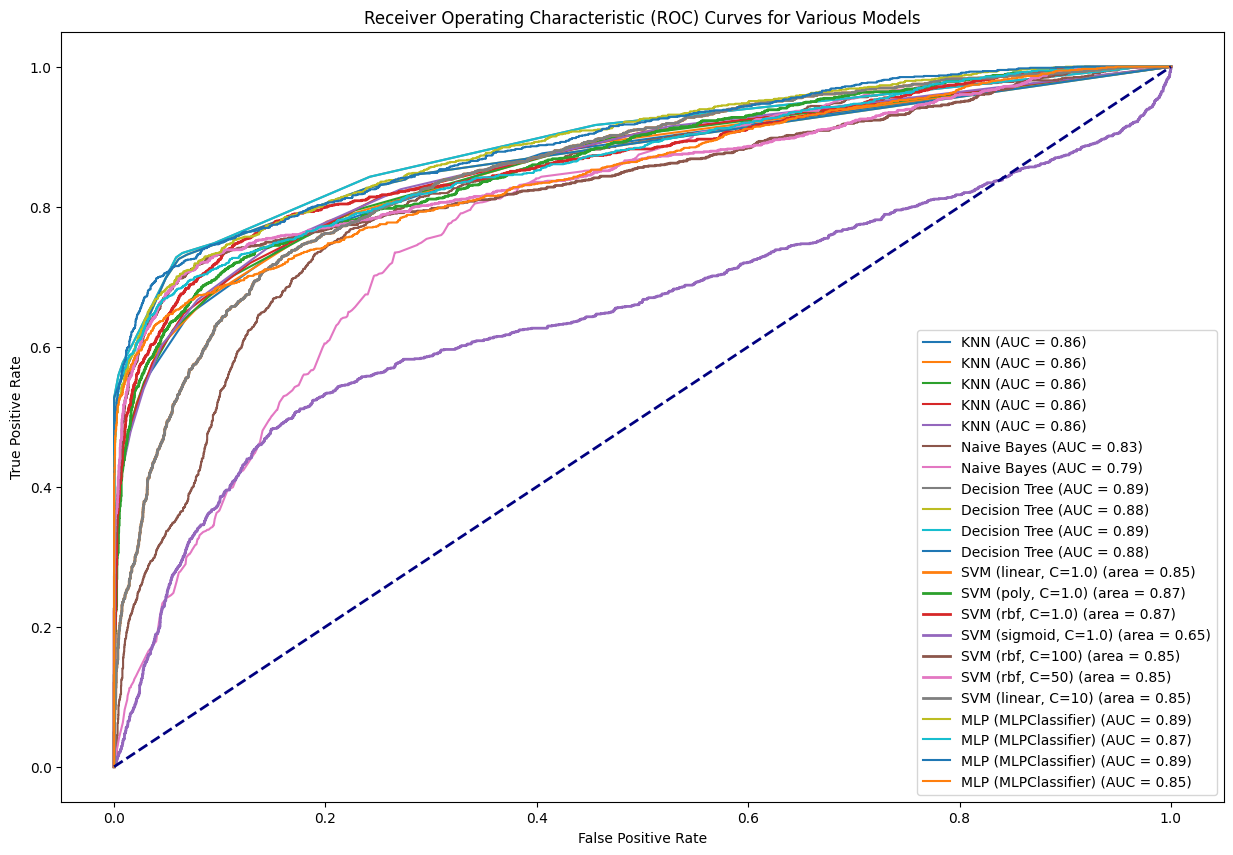

In [47]:

models_knn = [KNeighborsClassifier(n_neighbors=i) for i in range(7, 12)]
models_nb = [GaussianNB(), BernoulliNB()]
models_dt = [
    DecisionTreeClassifier(criterion="entropy", max_depth=5),
    DecisionTreeClassifier(criterion="entropy", max_depth=4),
    DecisionTreeClassifier(criterion="log_loss", max_depth=5),
    DecisionTreeClassifier(criterion="log_loss", max_depth=4)
]
svm_models = [
    SVC(kernel='linear'),
    SVC(kernel='poly'),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid'),
    SVC(C=100),
    SVC(C=50),
    SVC(kernel='linear', C=10)
]
mlp_models = [
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    MLPClassifier(hidden_layer_sizes=(300, 50), max_iter=500, random_state=42),
    MLPClassifier(hidden_layer_sizes=(300, 50), max_iter=100, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=500, batch_size=32)
]
plt.figure(figsize=(15, 10))
for model in models_knn:
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
for model in models_nb:
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
for model in models_dt:
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
for svm_model in svm_models:
    y_pred_proba_svm = svm_model.decision_function(X_test_scaled)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    plt.plot(fpr_svm, tpr_svm, lw=2, label=f'SVM ({svm_model.kernel}, C={getattr(svm_model, "C", 1)}) (area = {roc_auc_svm:.2f})')
for mlp_model in mlp_models:
    y_pred_proba_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
    roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP ({type(mlp_model).__name__}) (AUC = {roc_auc_mlp:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Various Models')
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

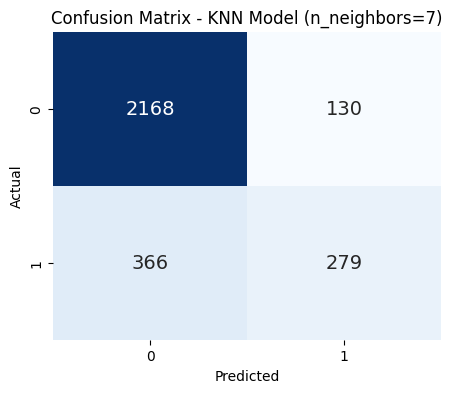

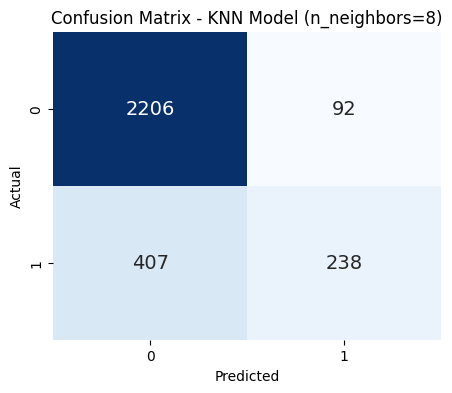

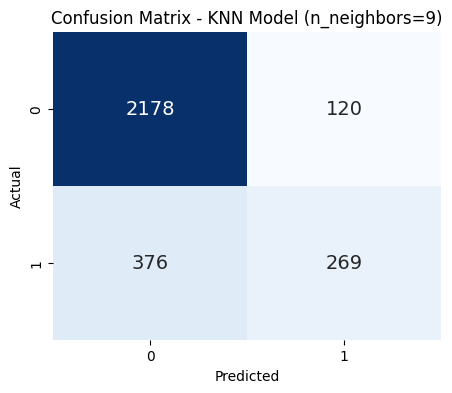

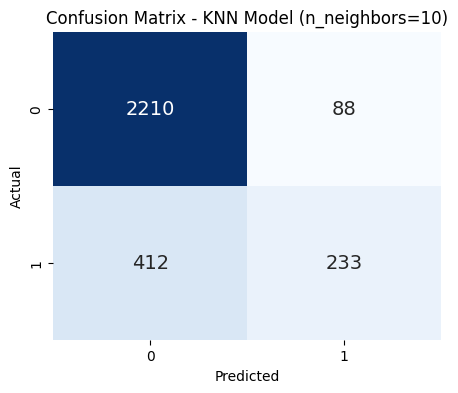

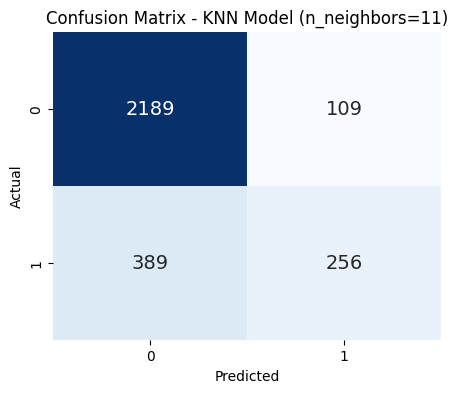

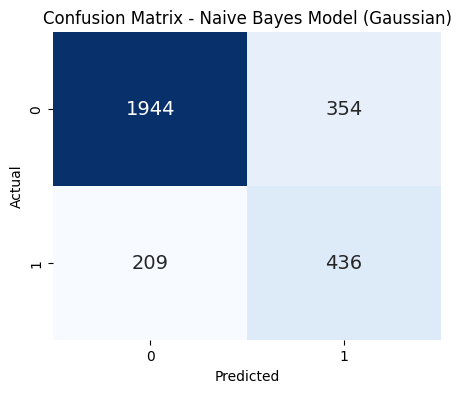

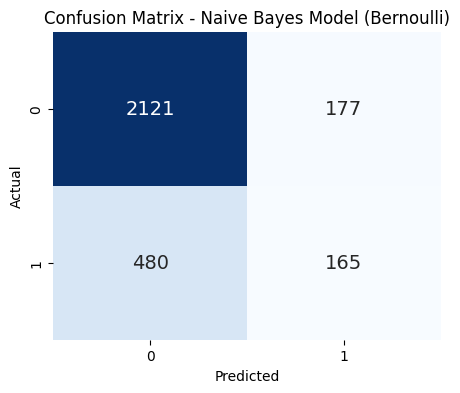

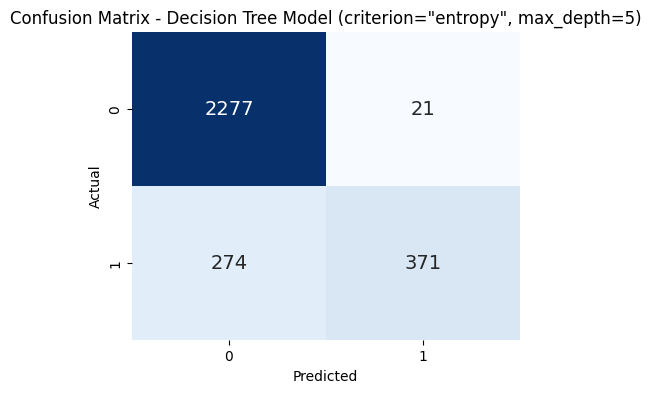

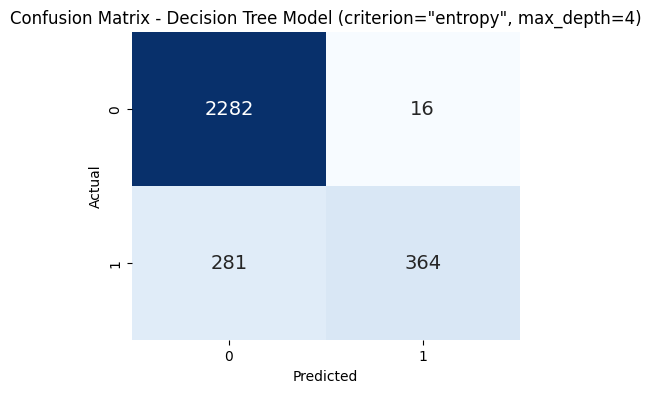

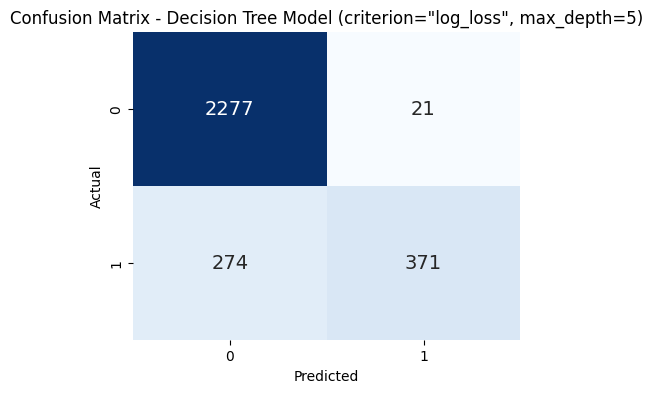

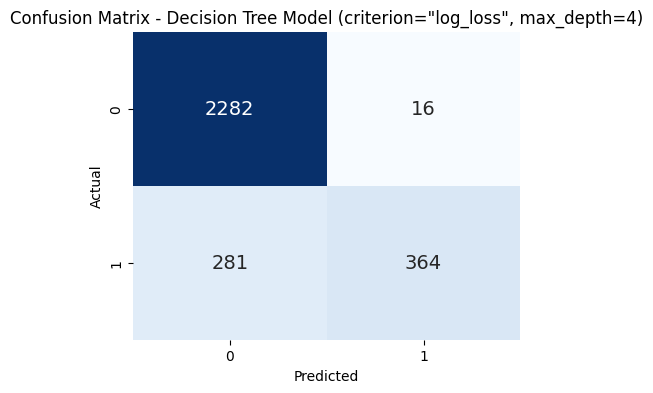

In [108]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model, model_name in knn_models:
    plot_confusion_matrix(model, X_test, y_test, model_name)
for model, model_name in naive_bayes_models:
    plot_confusion_matrix(model, X_test, y_test, model_name)
for model, model_name in decision_tree_models:
    plot_confusion_matrix(model, X_test, y_test, model_name)

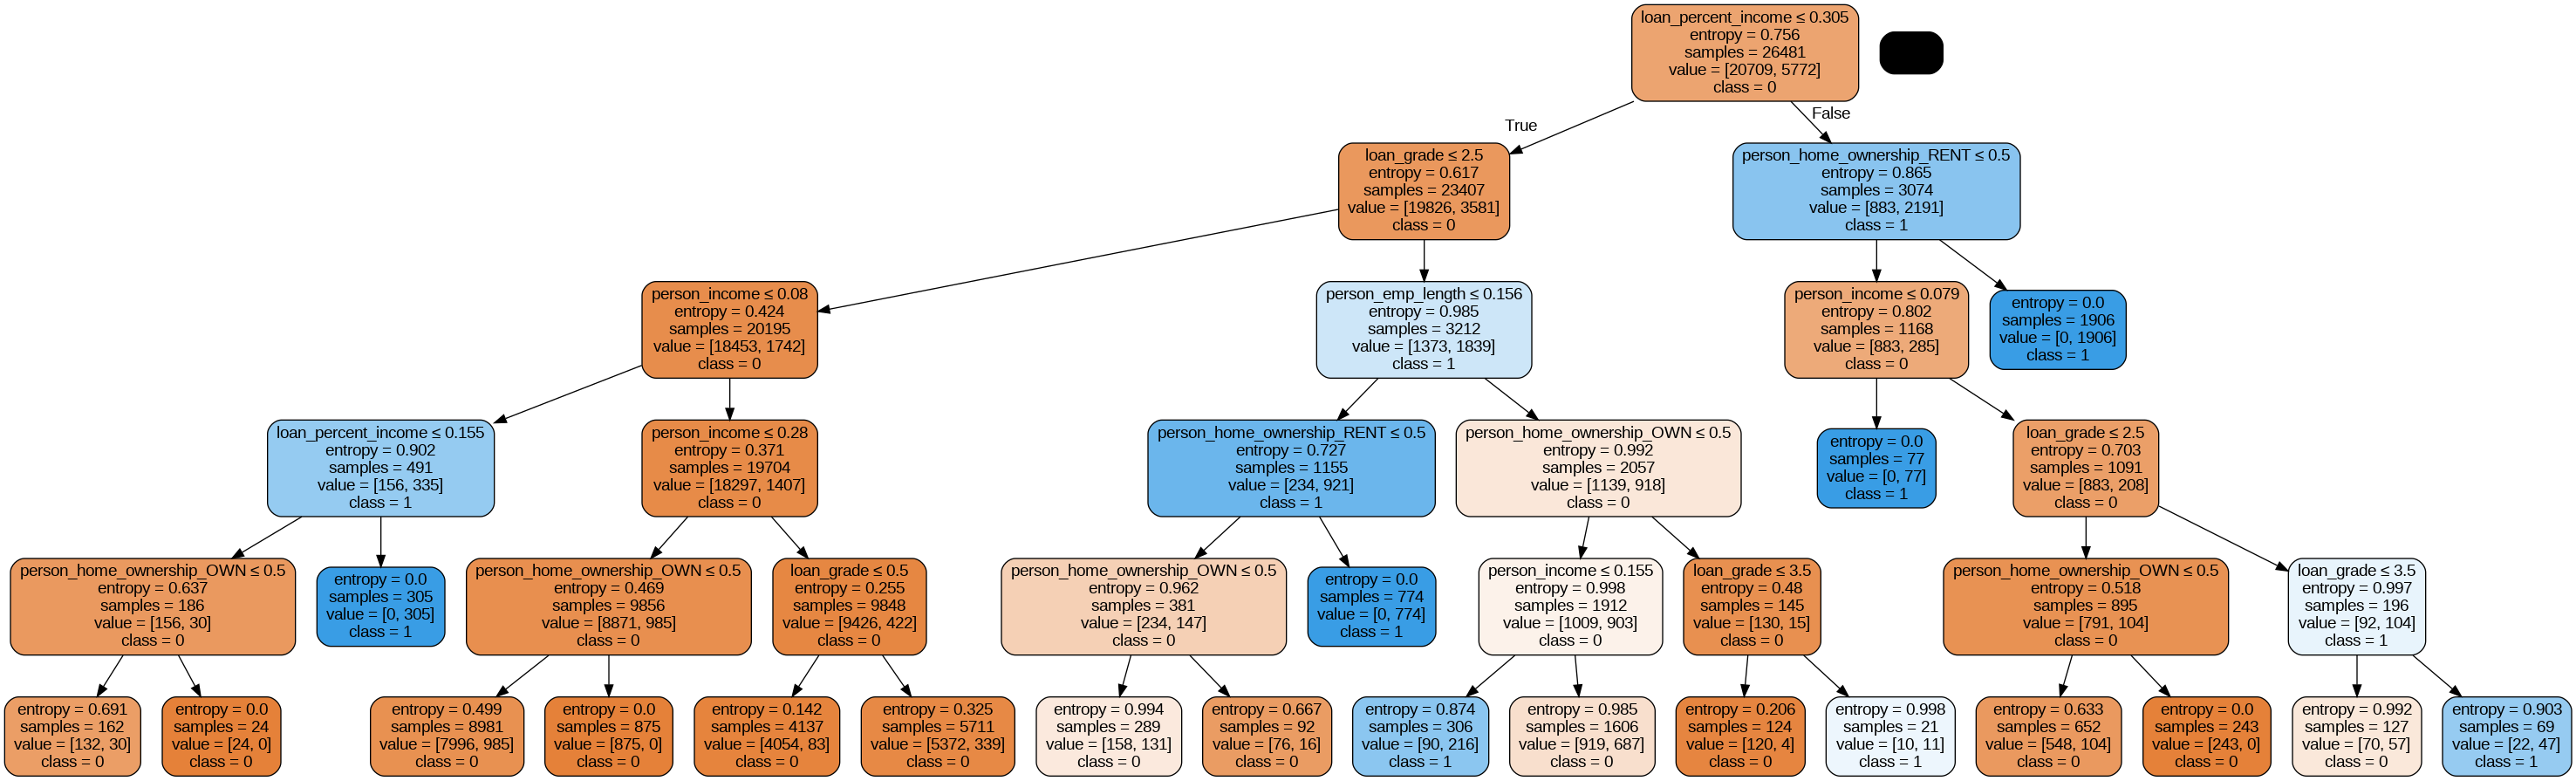

In [ ]:
dot_data = StringIO()
export_graphviz(model_DTr_ent, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decisiontree.png')
Image(graph.create_png())